In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
train_df = pd.read_csv('neighbourhood_data.csv')
districts = pd.read_csv('districts_data_cleaned.csv')
names = list(districts['name'].unique())
train_df = train_df[train_df['neighbourhood'].isin(names)]
counts = train_df['neighbourhood'].value_counts()
count_list = counts[counts > 50].index.tolist()
train_df = train_df[train_df['neighbourhood'].isin(count_list)]


train_df = train_df.loc[:, ~train_df.columns.str.contains('^Unnamed')]
train_df = train_df.astype({'bathrooms': 'int64'})
train_df = train_df.astype({'bedrooms': 'int64'})
train_df = train_df.astype({'interest_level': 'category'})
train_df = train_df.astype({'num_photos': 'int64'})
train_df = train_df.astype({'num_features': 'int64'})
train_df = train_df.astype({'num_description_words': 'int64'})
train_df = train_df.astype({'created_month': 'category'})
train_df = train_df.astype({'created_day': 'category'})
train_df = train_df.astype({'neighbourhood': 'str'})
train_df = train_df.astype({'price': 'int64'})
train_df.head()

,bathrooms,bedrooms,interest_level,num_photos,num_features,num_description_words,created_month,created_day,neighbourhood,price
0,1,1,medium,12,7,77,6,16,South Side,2400
1,1,3,medium,5,0,95,6,24,East Williamsburg,3000
2,3,3,low,11,2,205,6,28,Brooklyn Heights,6850
4,1,3,high,9,1,60,6,4,Sunset Park,2200
6,2,3,low,8,8,183,6,24,Crown Heights,3050


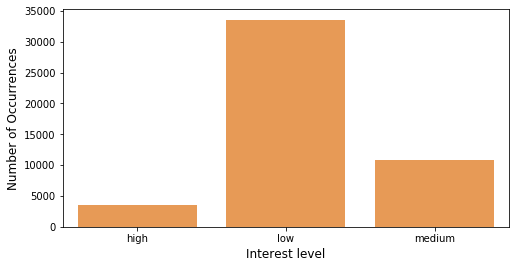

In [3]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

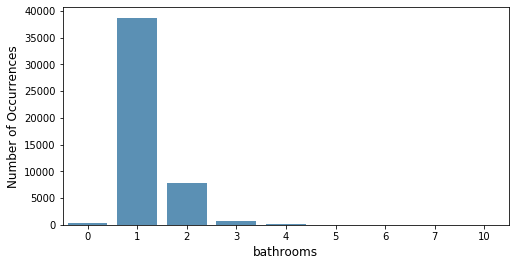

In [4]:
cnt_srs = train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

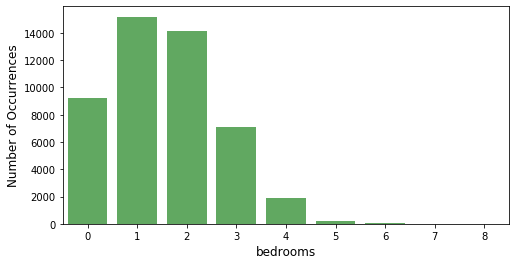

In [5]:
cnt_srs = train_df['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

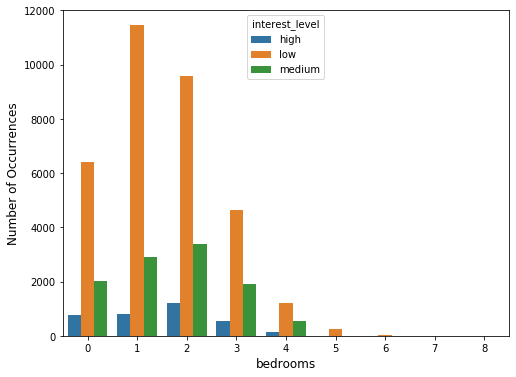

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

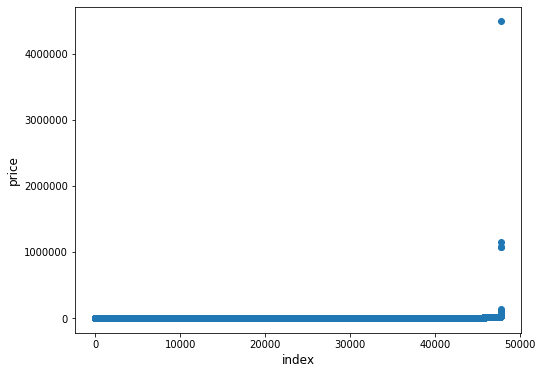

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


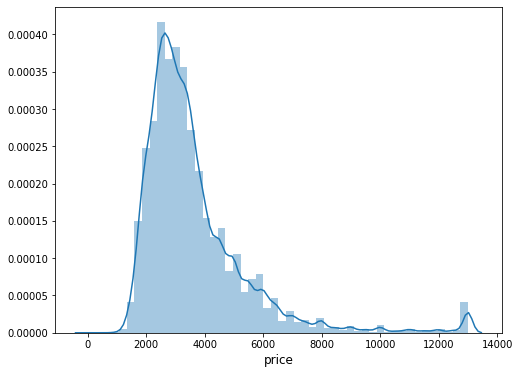

In [8]:
ulimit = np.percentile(train_df.price.values, 99)
train_df['price'].ix[train_df['price']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [9]:
# train_df[['price', 'boro_cd']].groupby(['boro_cd']).mean()

In [10]:
# train_df[['price', 'boro_cd']].groupby(['boro_cd']).std()

In [11]:
grouped = train_df[['price', 'neighbourhood']].groupby('neighbourhood', group_keys=False).apply(pd.DataFrame.sample, 5, replace = True)
print(grouped.groupby(['neighbourhood']).mean())
grouped.groupby(['neighbourhood']).std()

# 101 	4091.498433
# 102 	4151.814392
# 103 	3687.778427
# 104 	3666.281911
# 105 	4277.266374
# 106 	3807.612296
# 107 	4230.897276
# 108 	3647.022048
# 109 	2559.476293
# 110 	2617.046452
# 111 	3071.127291
# 112 	2198.330501
# 164 	4878.125000

                            price
neighbourhood                    
Astoria                    2159.0
Battery Park City          4698.0
Bay Ridge                  1790.0
Bedford Stuyvesant         2242.8
Boerum Hill                3105.0
Brooklyn Heights           3297.0
Bushwick                   2690.0
Carnegie Hill              3589.0
Carroll Gardens            3911.6
Central Harlem             2366.6
Chelsea                    3364.0
Chinatown                  2869.8
Civic Center               5346.2
Clinton                    4376.0
Clinton Hill               3363.0
Cobble Hill                3569.0
Crown Heights              2950.0
Downtown                   3588.8
Dumbo                      4565.6
East Harlem                3715.4
East Village               3384.0
East Williamsburg          2349.8
Financial District         3921.0
Flatbush                   1909.8
Flatiron                   3986.0
Forest Hills               2390.0
Forest Hills Gardens       2409.0
Gowanus       

,price
neighbourhood,
Astoria,439.494027
Battery Park City,4113.636773
Bay Ridge,374.833296
Bedford Stuyvesant,520.229949
Boerum Hill,527.494076
Brooklyn Heights,1056.584119
Bushwick,836.958780
Carnegie Hill,710.091543
Carroll Gardens,1061.212891


In [82]:
import scikits.bootstrap as bootstrap 
df = train_df[['price', 'neighbourhood']]
X = df.groupby('neighbourhood').apply(lambda x:bootstrap.ci(x.values, np.mean))
X = X.values
X = np.array(list(X), dtype=np.float)

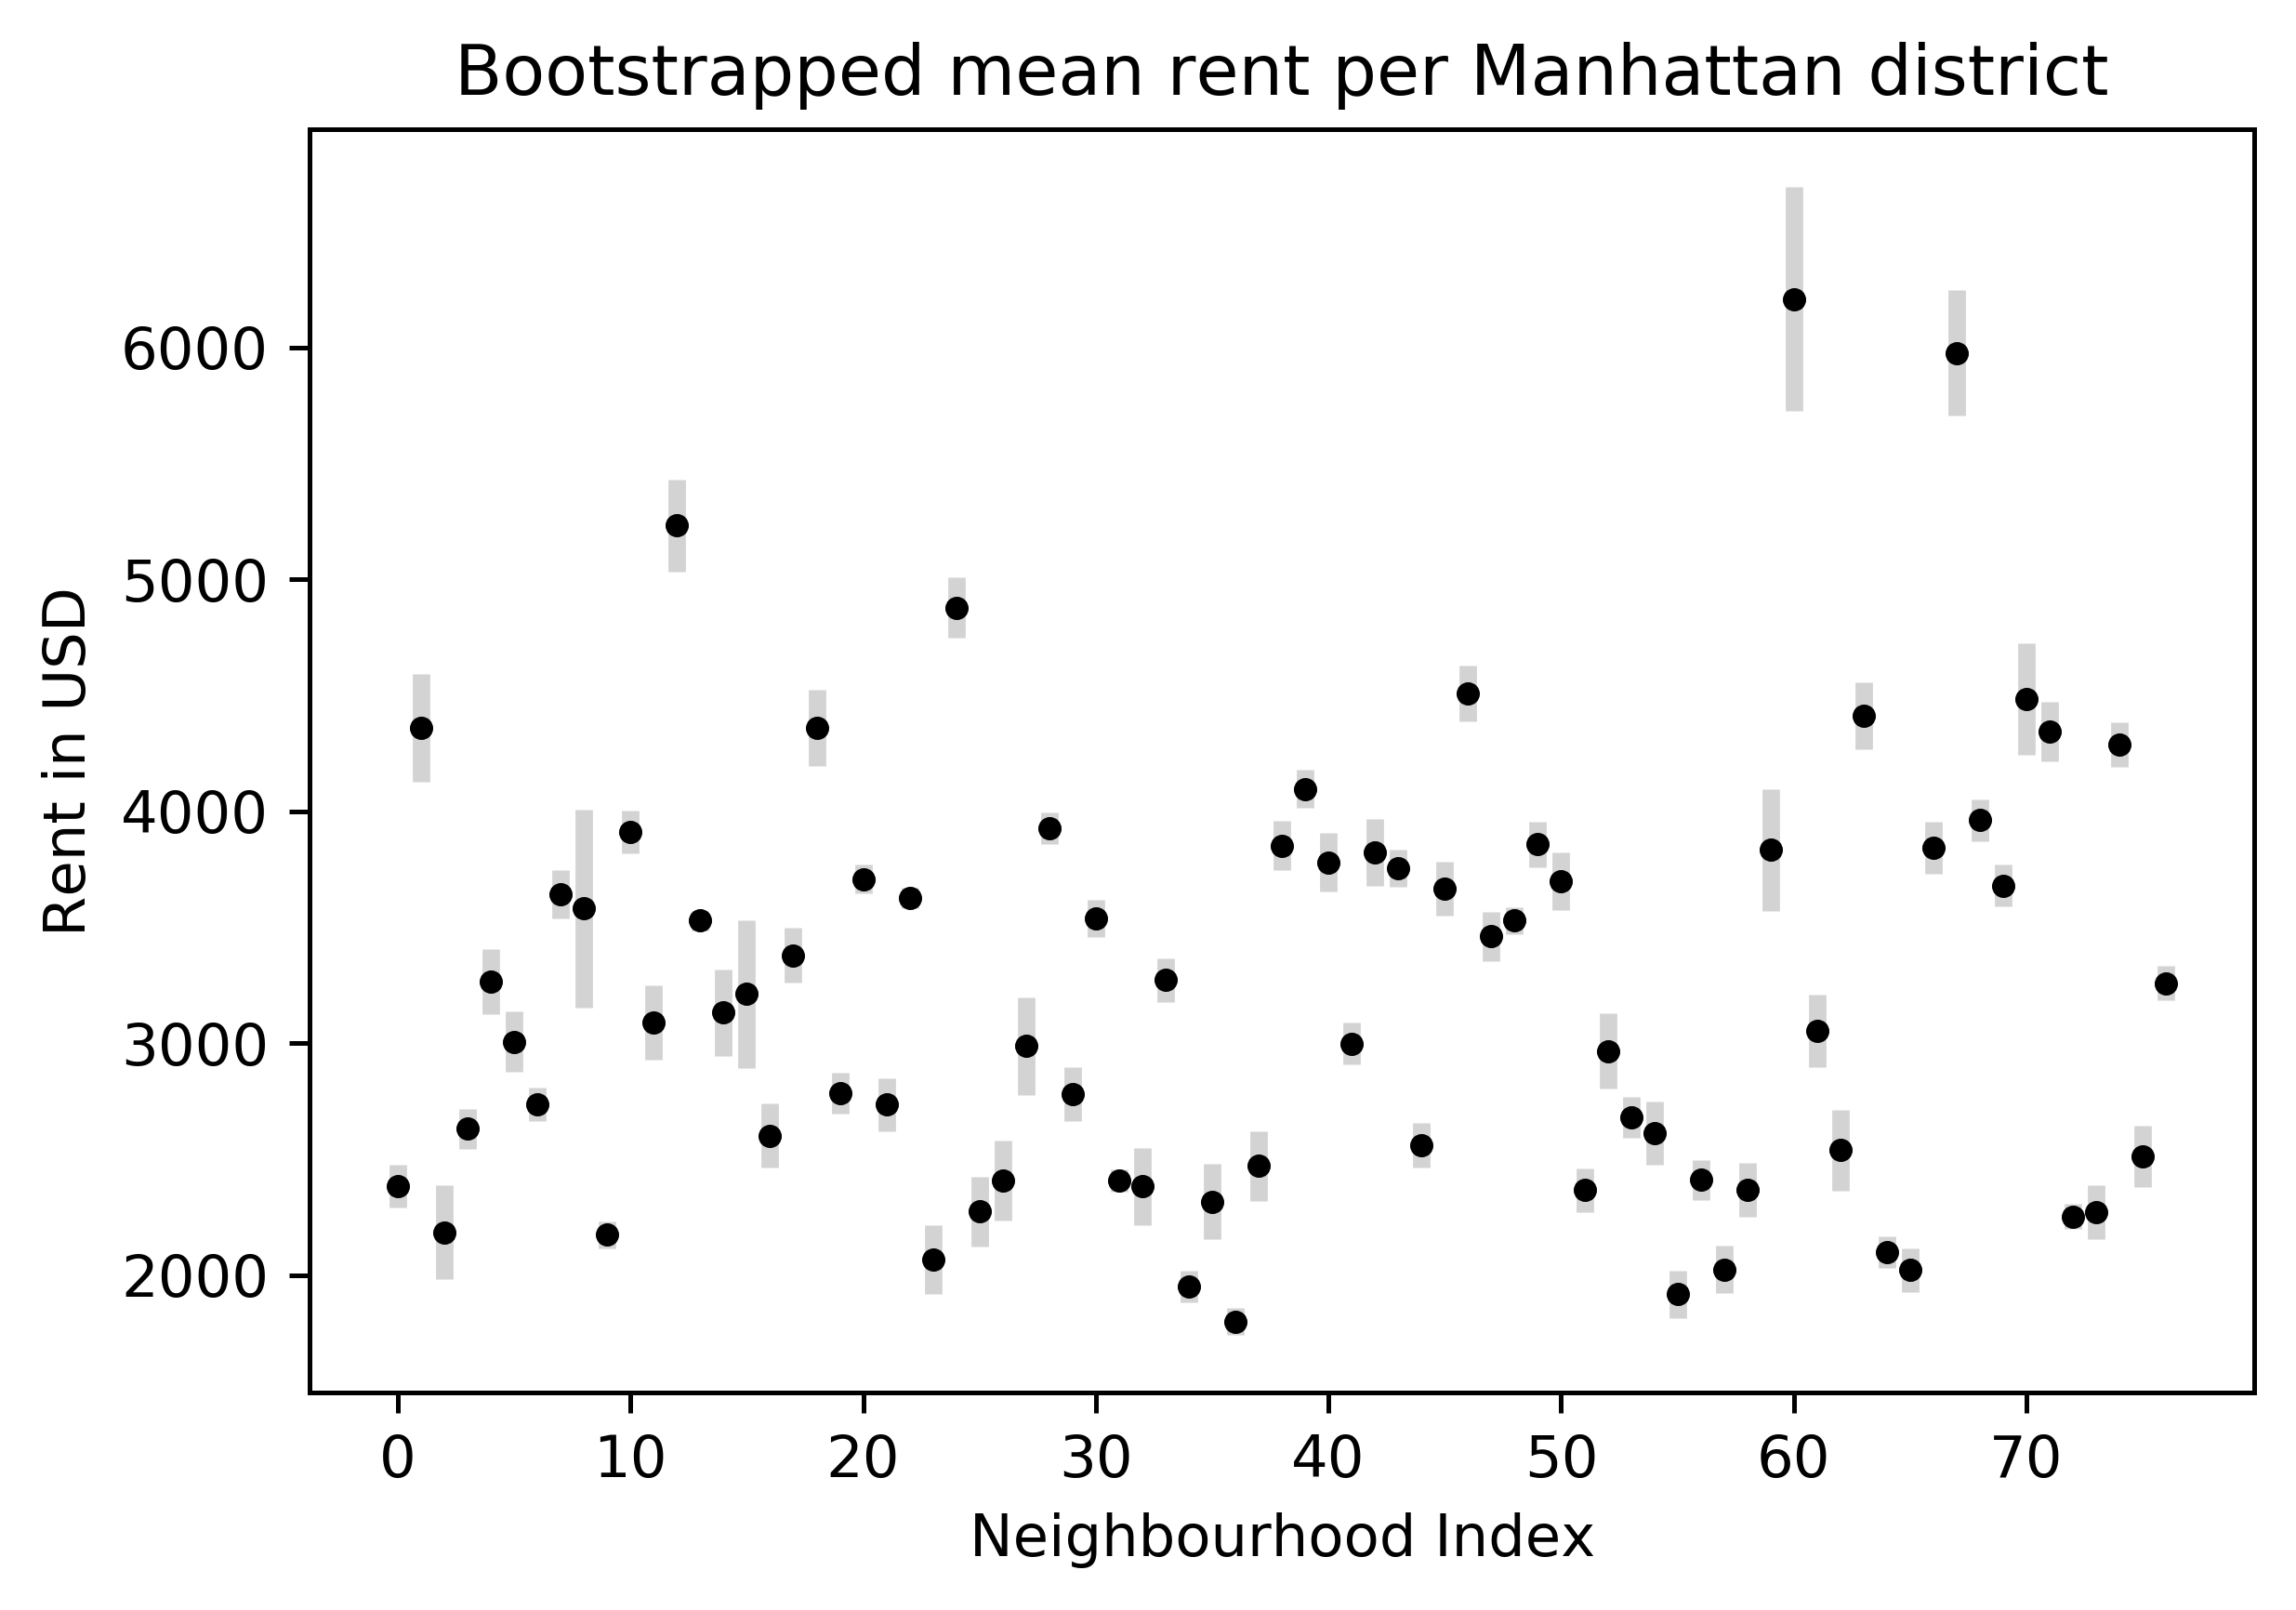

In [83]:
bootstraps = X # All districts

from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=450, facecolor='w', edgecolor='k')

mean = (bootstraps[:,0] + bootstraps[:,1]) / 2
p5 = bootstraps[:,0]
p95 = bootstraps[:,1]

plt.errorbar(
    x = range(bootstraps.shape[0]),
    y = mean,
    yerr=[mean - p5, p95 - mean],
    fmt='.k',
    color='black',
    ecolor='lightgray', 
    elinewidth=3, 
    capsize=0
)

plt.title('Bootstrapped mean rent per Manhattan district')
plt.ylabel('Rent in USD')
plt.xlabel('Neighbourhood Index')
# plt.xticks(range(bootstraps.shape[0]))
plt.show()

In [84]:
# plt.savefig('meanNoPark.png', dpi=450)
print(mean)

[2384.06666667 4358.52134831 2184.9702381  2630.32644628 3264.53061224
 3005.87837838 2736.6686217  3642.52324263 3580.76470588 2173.26184834
 3911.49511979 3089.89784946 5231.38184932 3528.61982813 3131.34916201
 3211.04477612 2601.60067114 3377.39112903 4358.50645161 2783.72202381
 3707.31451613 2735.43558282 3626.27929204 2066.46226415 4877.90113736
 2273.88947368 2407.25961538 2987.07211538 3928.20967742 2779.42201835
 3536.39828571 2406.8830303  2382.87121212 3272.09907121 1952.34181818
 2316.33823529 1798.87634409 2470.48529412 3851.67306667 4095.5283189
 3779.27522936 2997.73593074 3821.85810811 3753.95471698 2559.25462963
 3665.73349057 4507.77091255 3460.0433526  3528.46237458 3857.09913793
 3698.21449275 2365.99689441 2966.00268817 2679.35991379 2610.43984962
 1916.84615385 2410.43597561 2023.97841727 2365.71511628 3832.95147679
 6207.75342466 3052.52873563 2538.28947368 4411.9156051  2097.5
 2021.74752475 3842.60984595 5975.13068182 3961.52119072 3679.69496855
 4483.27553957

In [85]:
list(train_df)

['bathrooms',
 'bedrooms',
 'interest_level',
 'num_photos',
 'num_features',
 'num_description_words',
 'created_month',
 'created_day',
 'neighbourhood',
 'price']

In [86]:
# Pass 20 properties per node to train set
# Choose 2-3 nodes for training, 2-3 for validation, rest for testing
# Train GCN with labels being the sample average and features of each training instance are bootstrapped from train properties

In [87]:
# df.groupby('b', group_keys=False).apply(pd.DataFrame.sample, frac=.3)
train_samples = train_df.groupby('neighbourhood').apply(pd.DataFrame.sample, n=20)

In [88]:
train_samples

bathrooms  bedrooms interest_level  num_photos  \
neighbourhood                                                             
Astoria           47812          1         1            low           3   
                  46903          1         1            low           2   
                  47728          1         2           high           5   
                  47431          1         2            low           6   
                  48473          1         1            low           6   
                  47653          1         2            low           9   
                  48508          2         3         medium           2   
                  47920          1         1         medium           3   
                  47300          1         2         medium           7   
                  48437          1         1           high           5   
                  47302          1         1            low           3   
                  47684          1         3           high           8   
                  48549          1         2            low           4   
                  47580          1         2           high           6   
                  47182          1         1            low           1   
                  47982          1         1            low          10   
                  47701          1         2         medium           6   
                  47430          1         2            low           1   
                  48714          1         1            low           6   
                  47091          1         3           high           6   
Battery Park City 14276          1         0            low           4   
                  45614          1         1            low           6   
                  32837          1         1         medium           8   
                  41263          1         0           high           6   
                  31099          1         1         medium           4   
                  9508           1         0            low           0   
                  33564          2         2            low           4   
                  22950          1         0            low           3   
                  8475           1         3            low           4   
                  20953          3         3            low          10   
...                            ...       ...            ...         ...   
Windsor Terrace   4271           1         1            low           1   
                  1486           1         1            low           6   
                  283            2         3            low           9   
                  3726           1         2            low           4   
                  4378           1         2            low           3   
                  3671           1         0         medium           3   
                  4273           1         0            low           6   
                  431            1         1           high           5   
                  2556           1         1           high           3   
                  1470           1         2            low           9   
Yorkville         8780           1         0            low           3   
                  27571          1         0            low           8   
                  8647           1         2         medium           6   
                  35807          1         0            low           3   
                  5803           3         3            low           5   
                  25620          1         2            low           6   
                  28867          1         1            low           6   
                  22820          1         1            low          12   
                  15634          1         1            low           4   
                  20989          1         2            low           5   
                  40643          1         2      

In [89]:
train_samples.shape

(1540, 10)

In [119]:
def trainSet(n = 10, size = 1000):
    train_samples = train_df.groupby('neighbourhood').apply(pd.DataFrame.sample, n, replace = True)
    train_samples = train_samples.astype({'price': 'int64'})
    features = []
    labels = []
    for i, hood in enumerate(train_samples['neighbourhood'].unique()):
        samples = []
        label = []
        get_boro = train_samples[train_samples['neighbourhood'] == hood]
        get_boro = get_boro['price']
        for j in range(size):
            sample = get_boro.sample(n, replace = True).to_numpy()
            samples.append(sample)
            label.append(np.mean(sample))
        features.append(samples)
        labels.append(label)
    return np.array(features), np.array(labels)

In [120]:
X, y = trainSet()

In [121]:
np.mean(y, axis = 1)

array([2539.3796, 4431.462 , 2144.1665, 2454.7418, 3555.225 , 2627.7205,
       3050.5202, 2683.8558, 3478.196 , 2475.9012, 3980.6312, 2855.1952,
       4407.1   , 3658.688 , 3092.0165, 3631.454 , 2649.2465, 3098.7075,
       4039.4211, 2855.0842, 3155.088 , 2565.877 , 3229.1454, 2060.6238,
       5276.9278, 2604.5903, 2282.3575, 2942.406 , 3432.1365, 2840.4162,
       3283.7625, 2215.4314, 2682.9472, 3189.4062, 2178.7785, 2271.8776,
       1675.8155, 2500.2318, 3897.786 , 3597.7819, 3597.241 , 2952.5228,
       4343.9222, 4707.162 , 2714.9125, 2928.752 , 5455.8071, 3163.085 ,
       3092.935 , 3686.7715, 3557.005 , 2352.1975, 2846.625 , 2596.196 ,
       2515.3639, 2051.6075, 2409.2312, 2266.005 , 2420.6794, 3238.5807,
       6189.0139, 3137.6954, 2369.2375, 4830.4354, 2005.1575, 2067.315 ,
       3083.076 , 5946.416 , 3195.952 , 6516.302 , 4522.1395, 4802.775 ,
       2245.6875, 2495.1945, 3976.5633, 2455.0625, 4139.4204])

In [122]:
print(mean)

[2384.06666667 4358.52134831 2184.9702381  2630.32644628 3264.53061224
 3005.87837838 2736.6686217  3642.52324263 3580.76470588 2173.26184834
 3911.49511979 3089.89784946 5231.38184932 3528.61982813 3131.34916201
 3211.04477612 2601.60067114 3377.39112903 4358.50645161 2783.72202381
 3707.31451613 2735.43558282 3626.27929204 2066.46226415 4877.90113736
 2273.88947368 2407.25961538 2987.07211538 3928.20967742 2779.42201835
 3536.39828571 2406.8830303  2382.87121212 3272.09907121 1952.34181818
 2316.33823529 1798.87634409 2470.48529412 3851.67306667 4095.5283189
 3779.27522936 2997.73593074 3821.85810811 3753.95471698 2559.25462963
 3665.73349057 4507.77091255 3460.0433526  3528.46237458 3857.09913793
 3698.21449275 2365.99689441 2966.00268817 2679.35991379 2610.43984962
 1916.84615385 2410.43597561 2023.97841727 2365.71511628 3832.95147679
 6207.75342466 3052.52873563 2538.28947368 4411.9156051  2097.5
 2021.74752475 3842.60984595 5975.13068182 3961.52119072 3679.69496855
 4483.27553957

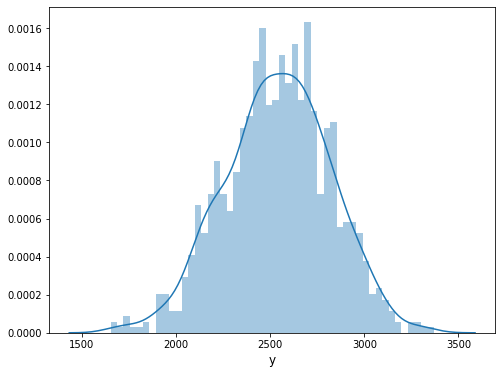

In [123]:
plt.figure(figsize=(8,6))
sns.distplot(y[0,:], bins=50, kde=True)
plt.xlabel('y', fontsize=12)
plt.show()

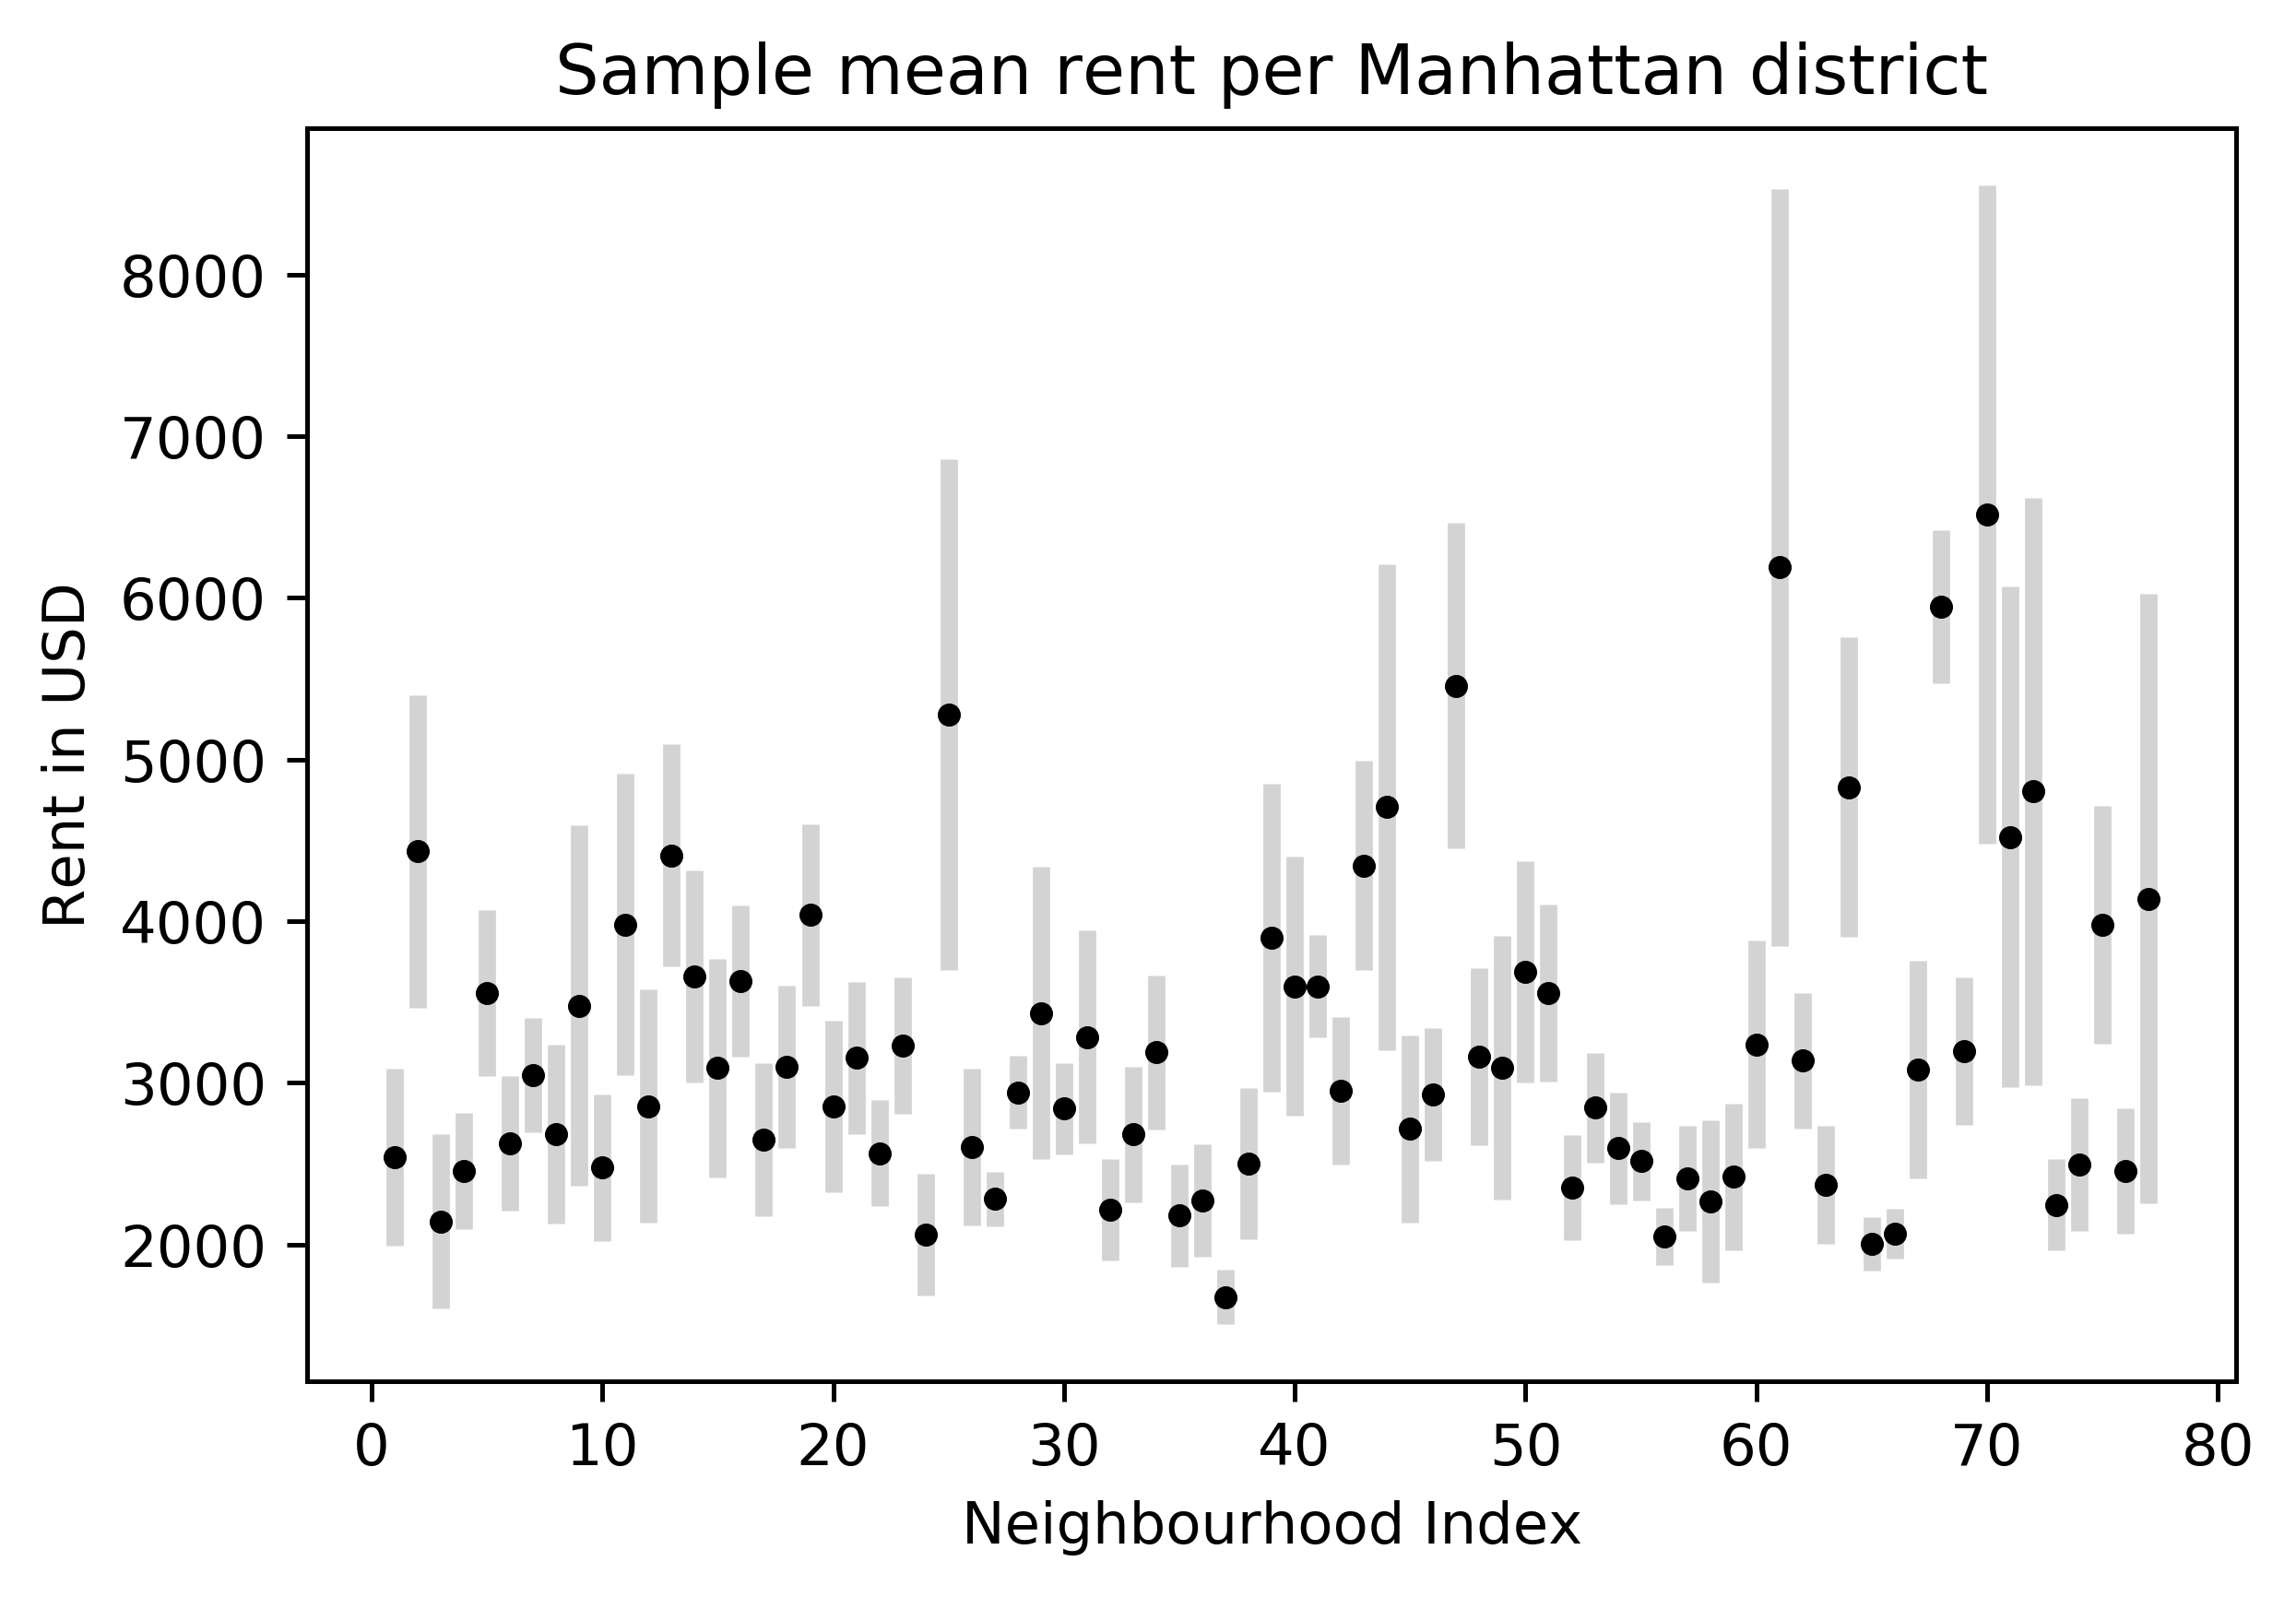

In [124]:
figure(num=None, figsize=(6, 4), dpi=450, facecolor='w', edgecolor='k')

sample_mean = np.mean(y, axis = 1)
sample_error = np.std(y, axis = 1)

plt.errorbar(
    x = range(1, bootstraps.shape[0] + 1),
    y = sample_mean,
    yerr= 1.96 * sample_error,
    fmt='.k',
    color='black',
    ecolor='lightgray', 
    elinewidth=3, 
    capsize=0
)

plt.title('Sample mean rent per Manhattan district')
plt.ylabel('Rent in USD')
plt.xlabel('Neighbourhood Index')
# plt.xticks(range(bootstraps.shape[0]))
plt.show()

In [125]:
def bootstrap(size = 10000):
    train_samples = train_df.groupby('neighbourhood').apply(pd.DataFrame.sample, frac = 1, replace = True)
    train_samples = train_samples.astype({'price': 'int64'})
    features = []
    labels = []
    for i, hood in enumerate(train_samples['neighbourhood'].unique()):
        samples = []
        label = []
        get_boro = train_samples[train_samples['neighbourhood'] == hood]
        get_boro = get_boro['price']
        for j in range(size):
            sample = get_boro.sample(frac = 1, replace = True).to_numpy()
            samples.append(sample)
            label.append(np.mean(sample))
        features.append(samples)
        labels.append(label)
    return np.array(features), np.array(labels)

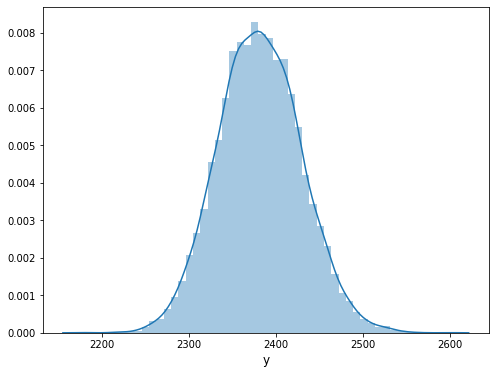

In [126]:
X, y = bootstrap()
plt.figure(figsize=(8,6))
sns.distplot(y[0,:], bins=50, kde=True)
plt.xlabel('y', fontsize=12)
plt.show()

In [127]:
np.std(y, axis = 1)

array([ 47.65434083, 116.99994447,  86.24181244,  42.71338828,
        69.25222215,  65.12457746,  36.77476542,  55.12960823,
       182.16623062,  28.13106229,  46.60068935,  80.13970572,
       101.02176547,  21.49300716, 119.41405618, 157.90435537,
        87.52529714,  60.22409219,  83.80348515,  45.06049796,
        30.39298744,  59.70717047,  23.25510781,  75.13927911,
        65.68252617,  77.9579882 ,  74.47401401,  98.16522645,
        33.58049428,  57.33781414,  41.91743992,  25.83696406,
        94.6011329 ,  45.07153325,  24.75638741,  74.5876492 ,
        30.47931331,  76.905925  ,  54.54414511,  43.5805343 ,
        53.63395168,  44.73337451,  75.44129976,  40.91333727,
        45.43148004,  55.61381911,  61.74518523,  54.51277423,
        29.72238153,  48.44142421,  56.5084633 ,  48.59689633,
        75.58633247,  43.51349362,  75.34620731,  47.27810785,
        43.48478692,  43.21407204,  63.34536218, 105.18213787,
       242.07161115,  80.75738115,  96.32933735,  71.68

In [128]:
print(mean)
print(np.mean(y, axis = 1))
print(mean - np.mean(y, axis = 1))

[2384.06666667 4358.52134831 2184.9702381  2630.32644628 3264.53061224
 3005.87837838 2736.6686217  3642.52324263 3580.76470588 2173.26184834
 3911.49511979 3089.89784946 5231.38184932 3528.61982813 3131.34916201
 3211.04477612 2601.60067114 3377.39112903 4358.50645161 2783.72202381
 3707.31451613 2735.43558282 3626.27929204 2066.46226415 4877.90113736
 2273.88947368 2407.25961538 2987.07211538 3928.20967742 2779.42201835
 3536.39828571 2406.8830303  2382.87121212 3272.09907121 1952.34181818
 2316.33823529 1798.87634409 2470.48529412 3851.67306667 4095.5283189
 3779.27522936 2997.73593074 3821.85810811 3753.95471698 2559.25462963
 3665.73349057 4507.77091255 3460.0433526  3528.46237458 3857.09913793
 3698.21449275 2365.99689441 2966.00268817 2679.35991379 2610.43984962
 1916.84615385 2410.43597561 2023.97841727 2365.71511628 3832.95147679
 6207.75342466 3052.52873563 2538.28947368 4411.9156051  2097.5
 2021.74752475 3842.60984595 5975.13068182 3961.52119072 3679.69496855
 4483.27553957

In [129]:
low = np.mean(y, axis = 1) - 1.96 * np.std(y, axis = 1)
high = np.mean(y, axis = 1) + 1.96 * np.std(y, axis = 1)

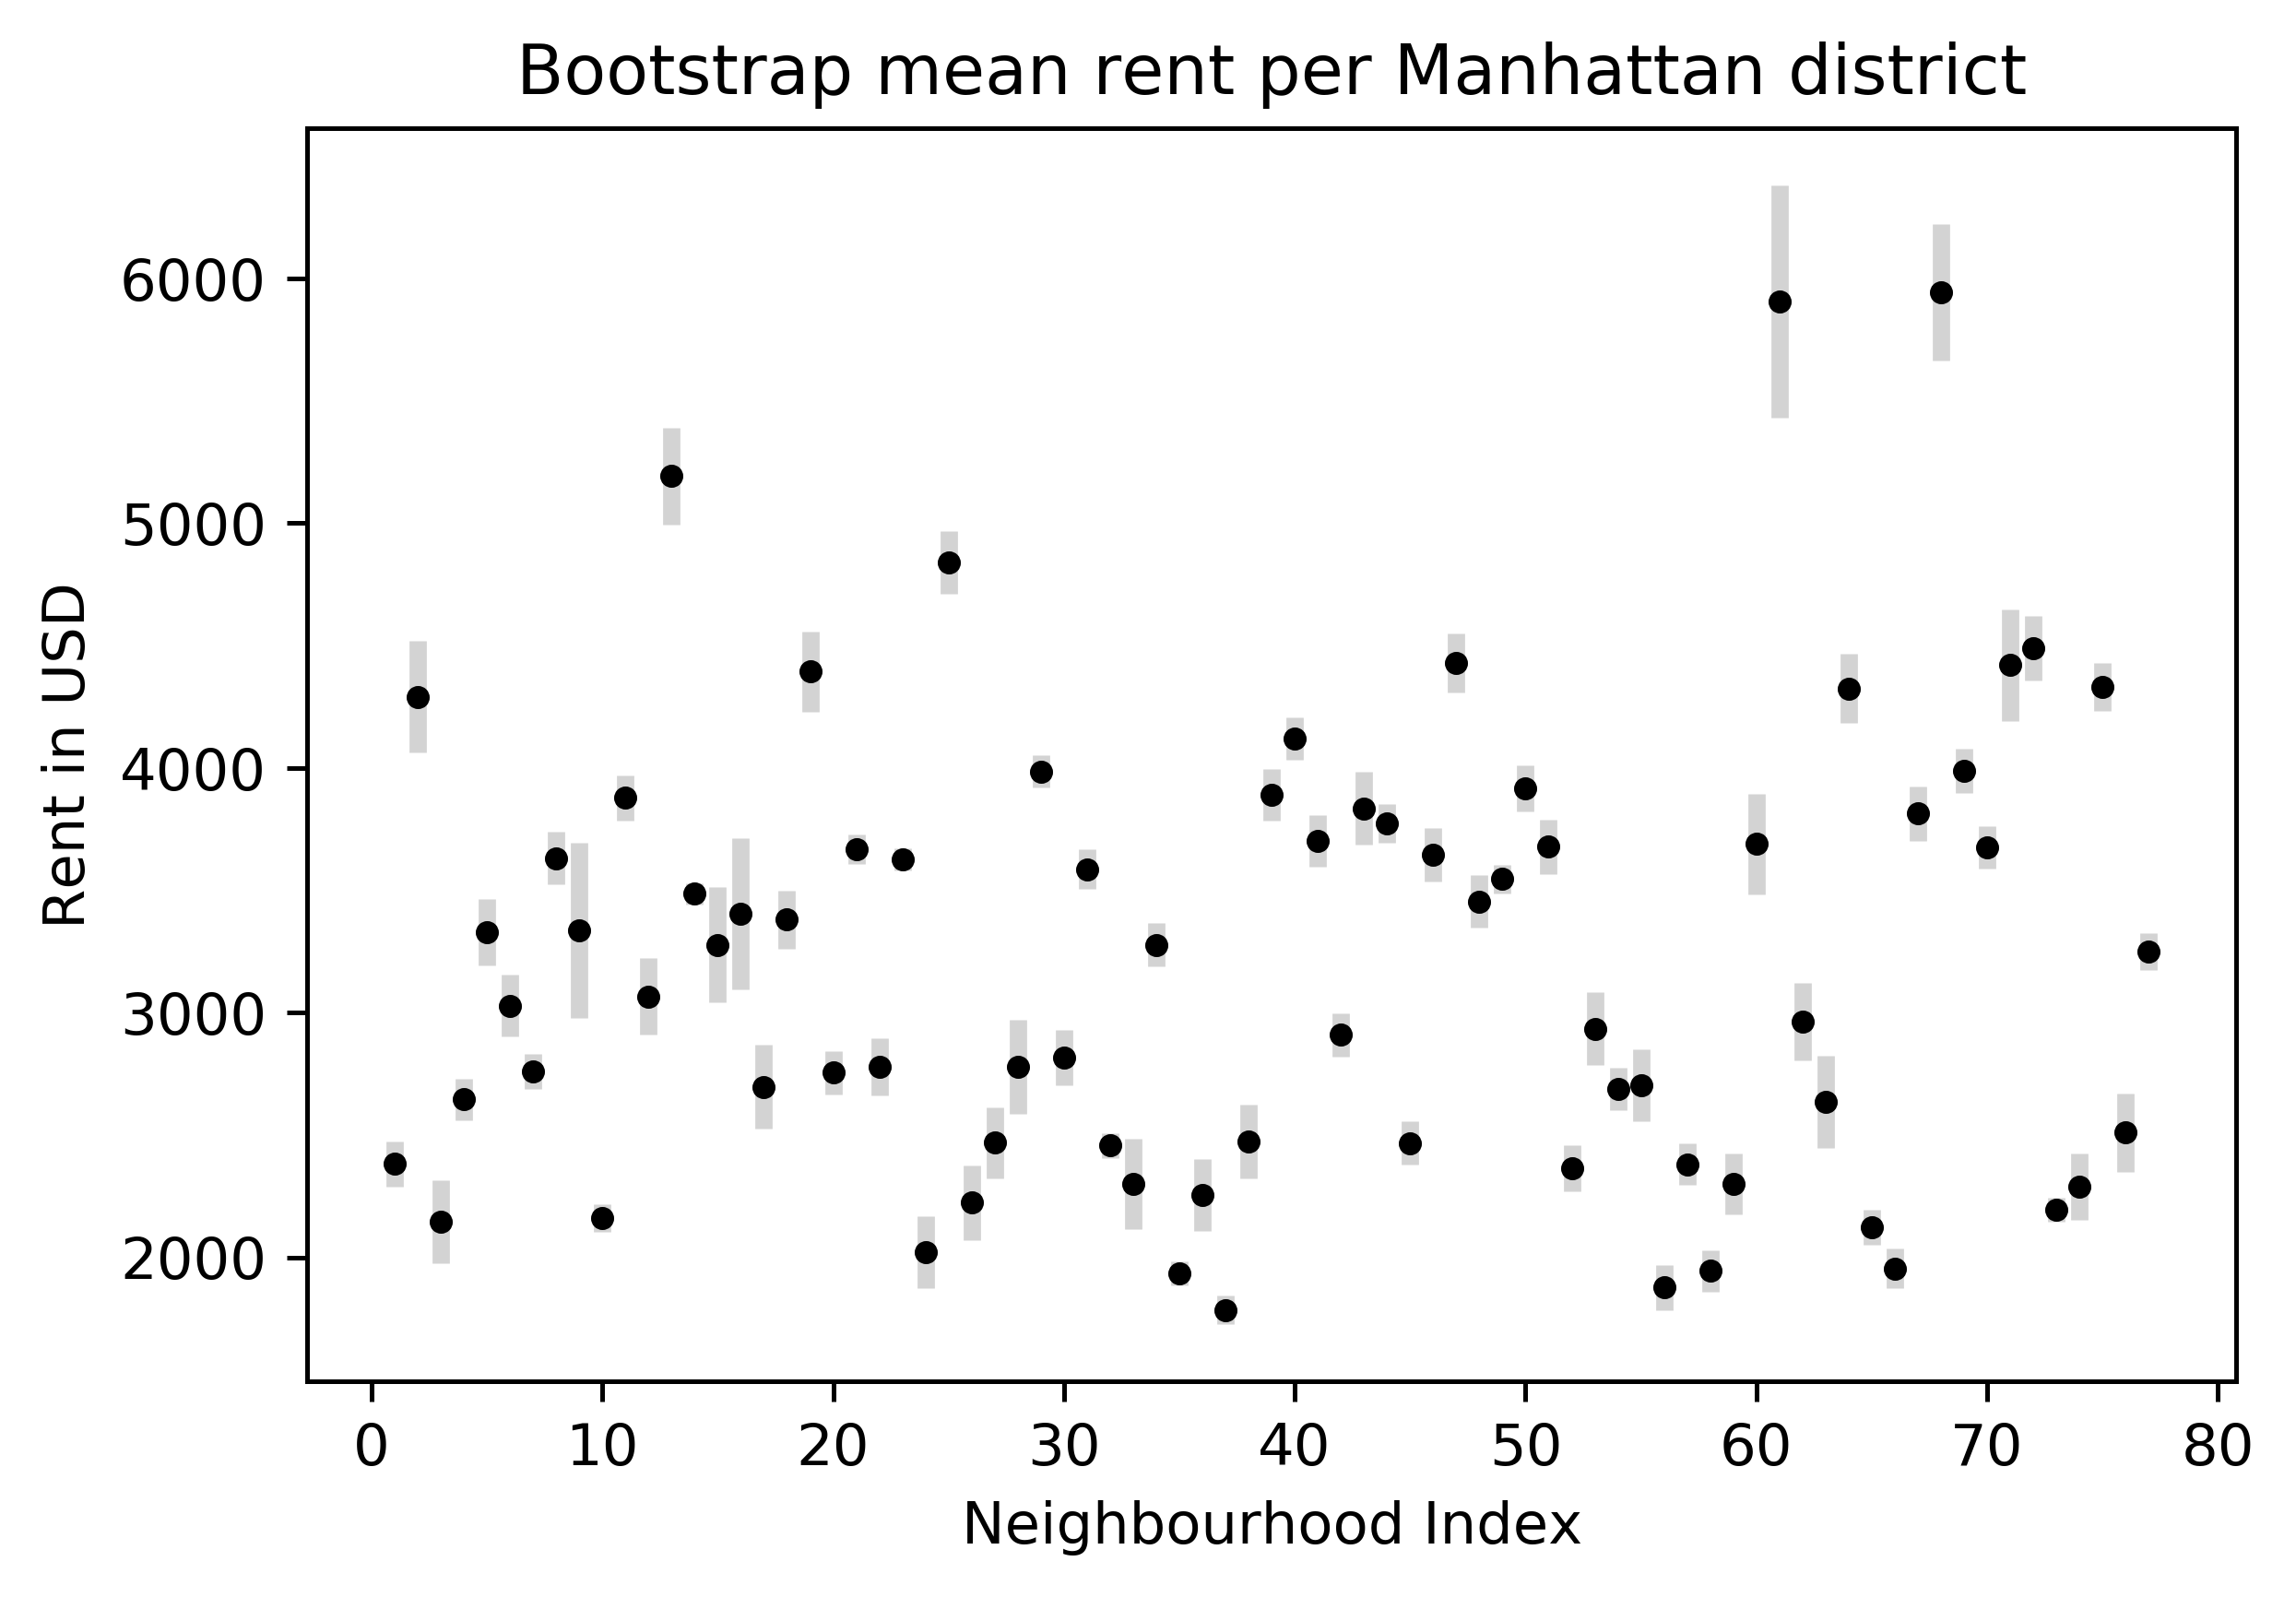

In [130]:
figure(num=None, figsize=(6, 4), dpi=450, facecolor='w', edgecolor='k')

sample_mean = np.mean(y, axis = 1)
sample_error = np.std(y, axis = 1)

plt.errorbar(
    x = range(1, bootstraps.shape[0] + 1),
    y = sample_mean,
    yerr= 1.96 * sample_error,
    fmt='.k',
    color='black',
    ecolor='lightgray', 
    elinewidth=3, 
    capsize=0
)

plt.title('Bootstrap mean rent per Manhattan district')
plt.ylabel('Rent in USD')
plt.xlabel('Neighbourhood Index')
# plt.xticks(range(1, bootstraps.shape[0] + 1))
plt.show()

In [131]:
import torch
print('Torch version:', torch.__version__)
import torch.nn as nn
import torch.nn.functional as F
import scipy.sparse as sp

# import dgl
# from dgl.nn.pytorch import GraphConv
# import networkx as nx

Torch version: 1.5.1


In [132]:
features = np.mean(y, axis = 1)
features = np.reshape(features,(features.shape[0], -1))
features = np.array(features, dtype='float')
# labels = mean
labels = np.array(mean, dtype = 'float')

# idx_train = list(np.array([1, 6, 7, 12]) - 1)
# idx_val = list(np.array([3, 5, 8, 10])  - 1)
# idx_test = list(np.array([2, 4, 9, 11])  - 1)

# produce a split for training, validation and testing
indices = np.arange(0, mean.shape[0]) # number of rows
np.random.shuffle(indices)
idx_train = indices[:59]
idx_val = indices[60:69]
idx_test = indices[70:]


# train_labels = [mean[i] for i in index_train]
# val_labels = [mean[i] for i in index_val]
# test_labels = [mean[i] for i in index_test]

adj = np.loadtxt('adj_nbhd.txt', dtype='float', delimiter=',')

# test = adj
# D = np.diag(np.power(np.sum(adj, axis = 1), -1))
# adj = np.dot(adj, D)

# adj = csr_matrix(adj)

# G = dgl.DGLGraph()
# adj_nx = nx.from_numpy_matrix(adj)
# G = dgl.from_networkx(adj_nx)

# print(features.shape)
# # print(features.T)

def normalize(mx):
    """Row-normalize sparse matrix"""
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx

adj = normalize(adj)
print(adj.shape)

(77, 77)


In [193]:
import math
import torch
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
import time


class GraphConvolution(Module):
    """
    Simple GCN layer, similar to https://arxiv.org/abs/1609.02907
    """

    def __init__(self, in_features, out_features, bias=True):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        if bias:
            self.bias = Parameter(torch.FloatTensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input, adj):
        support = torch.mm(input, self.weight)
        output = torch.spmm(adj, support)
        if self.bias is not None:
            return output + self.bias
        else:
            return output

    def __repr__(self):
        return self.__class__.__name__ + ' (' \
               + str(self.in_features) + ' -> ' \
               + str(self.out_features) + ')'


class GCN(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
#     def __init__(self, nfeat, nclass, dropout):
        super(GCN, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nclass)
#         self.gc1 = GraphConvolution(nfeat, nclass)

        self.dropout = dropout

    def forward(self, x, adj):
        x = F.relu(self.gc1(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, adj)
        return x
    
# def accuracy(output, labels):
#     preds = output.max(1)[1].type_as(labels)
#     correct = preds.eq(labels).double()
#     correct = correct.sum()
#     return correct / len(labels)

In [198]:
EPOCHS = 10000

# Model and optimizer
model = GCN(nfeat=features.shape[1],nhid=16,nclass=1,dropout=0.1)
# model = GCN(nfeat=features.shape[1],nclass=1,dropout=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.0001)
mse = nn.MSELoss()

features = torch.FloatTensor(features)
labels = torch.FloatTensor(mean)
adj = torch.FloatTensor(adj)
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)


def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features, adj)
    loss_train = mse(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    loss_val = mse(output[idx_val], labels[idx_val])
    if((epoch + 1) % 1000 == 0):
        print('Epoch: {:04d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(loss_train.item()),
              'loss_val: {:.4f}'.format(loss_val.item()),
              'time: {:.4f}s'.format(time.time() - t))


def test():
    model.eval()
    output = model(features, adj)
    loss_test = mse(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()))


# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

Epoch: 1000 loss_train: 985038.6250 loss_val: 597382.6875 time: 0.0010s
Epoch: 2000 loss_train: 965386.7500 loss_val: 670538.6875 time: 0.0010s
Epoch: 3000 loss_train: 962728.5000 loss_val: 650741.6875 time: 0.0010s
Epoch: 4000 loss_train: 949949.3750 loss_val: 586875.0625 time: 0.0010s
Epoch: 5000 loss_train: 935511.3125 loss_val: 738772.3750 time: 0.0010s
Epoch: 6000 loss_train: 961652.2500 loss_val: 764268.9375 time: 0.0010s
Epoch: 7000 loss_train: 961250.3125 loss_val: 712866.3125 time: 0.0000s
Epoch: 8000 loss_train: 941600.0000 loss_val: 762694.5000 time: 0.0010s
Epoch: 9000 loss_train: 972675.6875 loss_val: 719830.4375 time: 0.0010s
Epoch: 10000 loss_train: 953361.5625 loss_val: 592700.1250 time: 0.0010s
Optimization Finished!
Total time elapsed: 6.5345s
Test set results: loss= 1107743.6250


In [199]:
output = model(features, adj)

In [203]:
print(torch.mean(torch.abs(output.T-labels)))

tensor(667.2323, grad_fn=<MeanBackward0>)


In [204]:
print(torch.mean(torch.abs(features-labels)))

tensor(1018.0856)


In [170]:
# print(features)

In [168]:
# output

In [169]:
# print(labels)